# Data science blog post for the Zomato services dataset


## 1. Business understaning through the data evaluation

Motivation: Zomato is an online food ordering service provider and it is very interesting to analyze zomato performance in Indian cities where Indians 

are food lovers and very enthusiastic to use zomato services. This dataset has been taken from the Kaggle website and interested in 

understanding the following business questions

1. What are the 10 cities with highest average aggregated feedback rating.


2. What are the top 10 cities where the cost per two persons per visit is highest.


3. Average votes per restaurant in top 10 cities


4. Correlation between cost the per two, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price 
   range, Aggregate rating, no of votes with respect to restaurants in cities.


In [21]:
# importing the required pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Data understanding

In [22]:
# Loading the datset and merging with countries dataset to get the country name from country code
zomato_data = pd.DataFrame(pd.read_csv("zomato_data.csv",encoding='latin-1'))
country_code = pd.DataFrame(pd.read_csv("Country-Code.csv",encoding='latin-1'))
zomato_data=pd.merge(zomato_data,country_code, on='Country Code')
zomato_data.head(5)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [23]:
# analyse the dataset for no of rows and fields
print('No of rows = ',zomato_data.shape[0])
print('No of columns = ',zomato_data.shape[1])

No of rows =  9551
No of columns =  22


In [24]:
#analysing the dataset for the different numeric fields
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [25]:
#analysing the dataset for the different fields and data types
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [26]:
# By exploring the sample data, some of the fields do have categorical values and needs encoding.Exploring the distinct values for 
#Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range
print('Has Table booking - ',zomato_data['Has Table booking'].unique())
print('Has Online delivery - ',zomato_data['Has Online delivery'].unique())
print('Is delivering now - ',zomato_data['Is delivering now'].unique())
print('Switch to order menu - ',zomato_data['Switch to order menu'].unique())
print('Price range -',zomato_data['Price range'].unique())
print('Rating color - ',zomato_data['Rating color'].unique())
print('Rating text -',zomato_data['Rating text'].unique())


Has Table booking -  ['Yes' 'No']
Has Online delivery -  ['No' 'Yes']
Is delivering now -  ['No' 'Yes']
Switch to order menu -  ['No']
Price range - [3 4 2 1]
Rating color -  ['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']
Rating text - ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


## 3. Data preparation

In [28]:
# selecting the fields which are used for the data analysis and dropping the remaining fields from the dataset
zomato_data=zomato_data.drop(['Restaurant ID','Restaurant Name','Country Code','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Rating color','Rating text'],axis=1)

In [29]:
#checking for null values in the dataset
zomato_data.isnull().sum()


City                    0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Votes                   0
Country                 0
dtype: int64

In [30]:
#encoding the binary feilds using replace function
zomato_data['Has Table booking'].replace(['Yes', 'No'], [1, 0],inplace=True)
zomato_data['Has Online delivery'].replace(['Yes', 'No'], [1, 0],inplace=True)
zomato_data['Is delivering now'].replace(['Yes', 'No'], [1, 0],inplace=True)


In [31]:
#checking the no of rows for each country
zomato_counts = zomato_data.groupby('Country')['City'].count()
zomato_counts

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
Name: City, dtype: int64

In [32]:
# filtering and selecting the rows for India
zomato_india=zomato_data[zomato_data['Country']=='India']

## 4. Solving the business questions

### 1. What are the 10 cities with highest average aggregated feedback rating.

In [34]:
# getting the top 10 cities based on the aggreate raing
zomato_rating=zomato_india.groupby('City')['Aggregate rating'].mean()
zomato_rating=pd.DataFrame(zomato_rating)
zomato_rating['Aggregate rating']=zomato_rating['Aggregate rating'].round(2)
zomato_rating=zomato_rating.head(10)
zomato_rating.sort_values(by=['Aggregate rating'],ascending=False,inplace=True)
print(zomato_rating)


              Aggregate rating
City                          
Bangalore                 4.38
Chennai                   4.32
Ahmedabad                 4.16
Chandigarh                4.05
Bhubaneshwar              3.98
Agra                      3.96
Bhopal                    3.95
Amritsar                  3.69
Allahabad                 3.39
Aurangabad                3.37


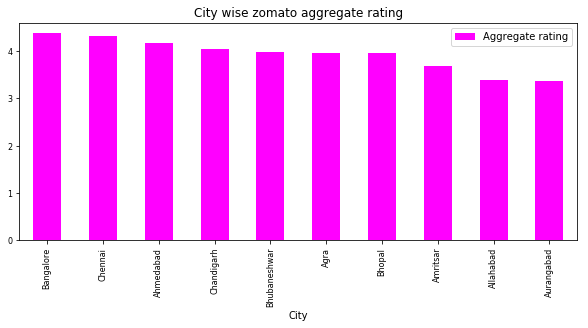

In [35]:
# plotting the bar graph for top 10 cities with high aggregate rating
zomato_rating.plot(kind = 'bar',title ="City wise zomato aggregate rating", figsize=(10, 4), legend=True, fontsize=8, color='magenta')

From the above rating graph it is evident that 
i. Bangalore is having highest rating. Bangalore being most busy city with majority of working class community, high no of migrants with different food habits the zomato services has been rated high. 

ii. Next to Bangalore are Chennai, Ahmedabad, Chandigarh are other cities with the rating above 4. 

iii. Though Chandigarh and Bhubaneshwar are smaller cities compared Bangalore, the Zomato rating has been good and above 4.

### 2. What are the top 10 cities where the cost per two persons per visit to a restaurant is highest.

In [16]:
# getting the top 10 cities based on the high cost per two persons per visit
zomato_cost=pd.DataFrame(zomato_india.groupby(['City'])['Average Cost for two'].mean())
zomato_cost=zomato_cost.head(10)
zomato_cost['Average Cost for two']=zomato_cost['Average Cost for two'].round()
zomato_cost.sort_values(by=['Average Cost for two'],ascending=False,inplace=True)
zomato_cost

,Average Cost for two
City,
Bangalore,1232.0
Chennai,1085.0
Chandigarh,1072.0
Agra,1065.0
Ahmedabad,857.0
Bhubaneshwar,679.0
Aurangabad,622.0
Bhopal,620.0
Allahabad,518.0


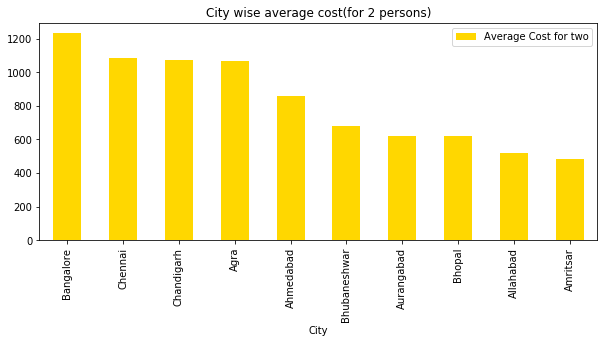

In [36]:
# plotting cost graph for top 10 cities
zomato_cost.plot(kind = 'bar',title ="City wise average cost(for 2 persons)", figsize=(10, 4), legend=True, fontsize=10, color='gold')


i. Bangalore being the top city with respect to the cost also.  

ii. Though the cost is high, the feedback rating is high for Bangalore. 

iii. Similar pattern is observed for Chennai and Chandigarh also

iv. The cost is high in Agra too, may be due Agra being tourist place


### 3 Average votes per restaurant in top 10 cities

In [18]:
# computing the average votes per restaurant in to 10 cities
zomato_votes=pd.DataFrame(zomato_india.groupby(['City'])['Votes'].mean().round())
zomato_votes=pd.DataFrame(zomato_votes.head(10))
zomato_votes.sort_values(by=['Votes'],ascending=False,inplace=True)
zomato_votes

,Votes
City,
Bangalore,2806.0
Chennai,1385.0
Ahmedabad,584.0
Chandigarh,575.0
Bhubaneshwar,202.0
Amritsar,175.0
Bhopal,144.0
Agra,103.0
Allahabad,70.0


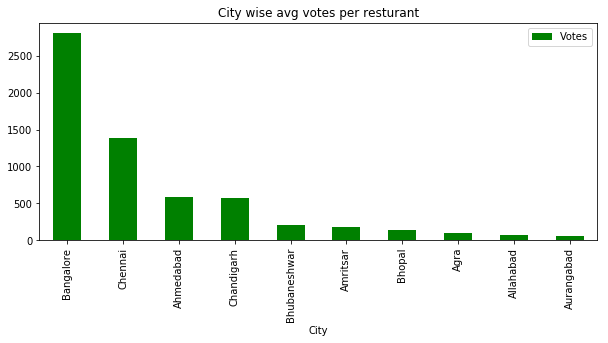

In [37]:
#plotting the voting graph for the top 10 cities
zomato_votes.plot(kind = 'bar',title ="City wise avg votes per resturant", figsize=(10, 4), legend=True, fontsize=10, color='green')


i.	Bangalore being the top city with  respect to average no of votes per restaurant

ii.	Chennai will be next to Bangalore in terms of average votes per restaurant

iii. Bangalore is the top city with respect to the cost, aggregated feedback rating and also no of votes received.


### 4. Correlation analysis between cost the per two, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, no of votes.

In [19]:
# calulating the correlation matrix with fields with numeric and binary data used for analysis
zomato_india.corr()


,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.609883,0.064400,0.007771,0.837964,0.344172,0.281765
Has Table booking,0.609883,1.000000,0.089147,-0.018587,0.581232,0.222713,0.188060
Has Online delivery,0.064400,0.089147,1.000000,0.100709,0.138097,0.295358,0.104731
Is delivering now,0.007771,-0.018587,0.100709,1.000000,0.018339,0.026174,0.001704
Price range,0.837964,0.581232,0.138097,0.018339,1.000000,0.409121,0.310859
Aggregate rating,0.344172,0.222713,0.295358,0.026174,0.409121,1.000000,0.287692
Votes,0.281765,0.188060,0.104731,0.001704,0.310859,0.287692,1.000000


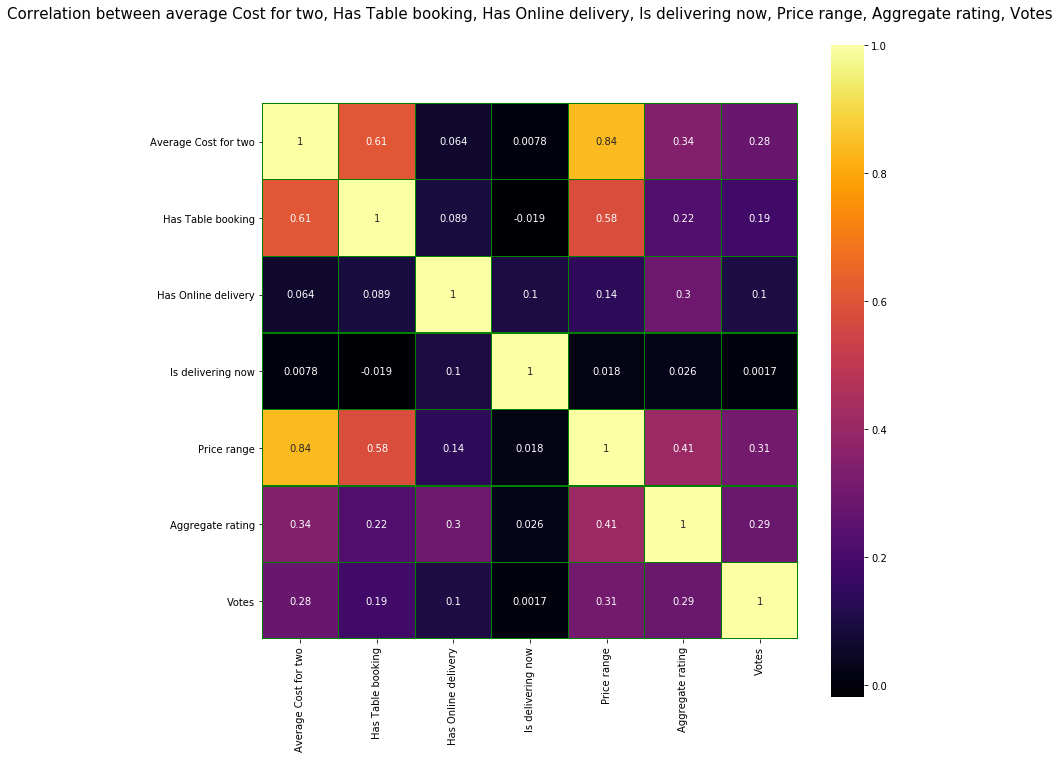

In [38]:
# plotting the coorealtion heat map
plt.figure(figsize=(12,12))
plt.title('Correlation between average Cost for two, Has Table booking, Has Online delivery, Is delivering now, Price range, Aggregate rating, Votes\n\n\n', y=1.05, size=15)
sns.heatmap(zomato_india.corr(),linewidths=0.2,vmax=1.0, 
            square=True, cmap=plt.cm.inferno, linecolor='green', annot=True)

From the above heat map following correlation can be arrived

i. cost is highly correlated with price range and has table booking

ii. cost has fairly good correlation with aggregate rating and votes

iii. is delivering now is insignificant and poorly correlated with other fields. 

## Conclusion
The conclusion is Zomato has been well established in Bangalore followed by Chennai, Chandigarh, Ahmedabad and Bhubaneshwar. This has been justified with bar graphs for cost, aggregated rating and votes. This analysis is supported by above correlation analysis through heat map.
